In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import widgets

# Read the CSV file into a DataFrame
df = pd.read_csv('data.csv',encoding='latin1')

# Display the DataFrame
df.describe()


/var/folders/f8/nzgsfvqj4m11ddxpcz4ntp380000gn/T/ipykernel_28172/3963998506.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv',encoding='latin1')


,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [45]:
# Since we're looking most air pollution data, converting NA values to 0 is a reasonable choice
df = df.fillna(0)
df.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0,0.0,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,0.0,0.0,0,0.0,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0,0.0,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0,0.0,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,0.0,0.0,0,0.0,1990-03-01


In [46]:
# Drop the bad data where date is 0
df.drop(df[df.date == 0].index, inplace = True)

In [47]:
# Get the year column from the date column for grouping by year
df['year'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.strftime('%Y')
df['month'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.strftime('%m')

df.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year,month
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-15,2015,12
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-18,2015,12
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-21,2015,12
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-24,2015,12
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29,2015,12


In [48]:
# Remove the non-numeric columns that are not needed
state_numeric_only_df = df.drop(['stn_code', 'sampling_date', 'location', 'agency', 'type', 'location_monitoring_station', 'date', 'month'], axis=1)
city_numeric_only_df = df.drop(['stn_code', 'sampling_date', 'state', 'agency', 'type', 'location_monitoring_station', 'date', 'month'], axis=1)

# Get unique years from the data
years = df['year'].unique()
years.sort()

print(years)

['1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996'
 '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006'
 '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015']


In [54]:
# Group data by city and year
grouped_by_city = city_numeric_only_df.groupby(['location','year']).mean().reset_index()
# Calculate the sum of so2, no2, rspm, spm and pm2.5 for each city to get total pollution level
grouped_by_city['total_pollution'] = grouped_by_city['so2'] + grouped_by_city['no2'] + grouped_by_city['rspm'] + grouped_by_city['spm'] + grouped_by_city['pm2_5']


plt.figure(figsize=(40, 6))
def plot_city_by_year(year=2015):
    plt.title('Top 10 most polluted states in ' + str(year))
    sns.barplot(x='location', y='total_pollution', data=grouped_by_city[grouped_by_city['year'] == year].nlargest(10, 'total_pollution'))
    plt.legend(['Total Pollution'])
    plt.xticks(rotation=45)
    plt.show()
    

widgets.interact(plot_city_by_year, year=years)

<Figure size 4000x600 with 0 Axes>

interactive(children=(Dropdown(description='year', options=('1987', '1988', '1989', '1990', '1991', '1992', '1…

<function __main__.plot_city_by_year(year=2015)>

In [53]:
# Group data by state and year
grouped_by_state = state_numeric_only_df.groupby(['state','year']).mean().reset_index()
# Calculate the sum of so2, no2, rspm, spm and pm2.5 for each state to get total pollution level
grouped_by_state['total_pollution'] = grouped_by_state['so2'] + grouped_by_state['no2'] + grouped_by_state['rspm'] + grouped_by_state['spm'] + grouped_by_state['pm2_5']
grouped_by_state.head()

# Make bar full width
plt.figure(figsize=(40, 6))
def plot_state_by_year(year=2015):
    plt.title('Top 10 most polluted states in ' + str(year))
    sns.barplot(x='state', y='total_pollution', data=grouped_by_state[grouped_by_state['year'] == year].nlargest(10, 'total_pollution'))
    plt.legend(['Total Pollution'])
    plt.xticks(rotation=45)
    plt.show()
    

widgets.interact(plot_state_by_year, year=years)

<Figure size 4000x600 with 0 Axes>

interactive(children=(Dropdown(description='year', options=('1987', '1988', '1989', '1990', '1991', '1992', '1…

<function __main__.plot_state_by_year(year=2015)>

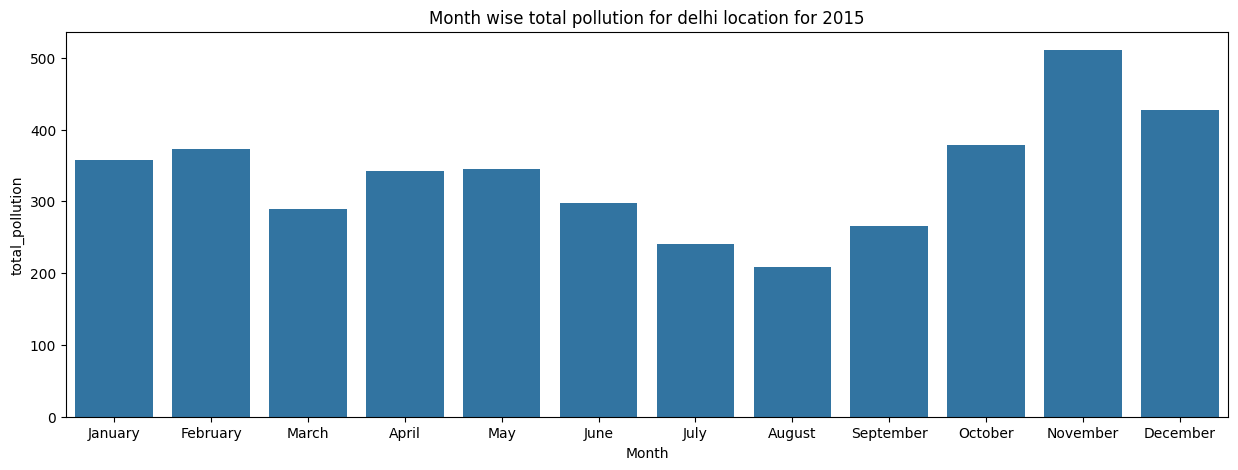

In [51]:
# Plot Month wise total pollution for delhi location for 2015
delhi_df = df[(df['location'] == 'Delhi') & (df['year'] == '2015')]
delhi_numeric_only_df = delhi_df.drop(['stn_code', 'sampling_date', 'state', 'agency', 'type', 'location_monitoring_station', 'date', 'year', 'location'], axis=1)

grouped_by_month = delhi_numeric_only_df.groupby(['month']).mean().reset_index()
grouped_by_month['total_pollution'] = grouped_by_month['so2'] + grouped_by_month['no2'] + grouped_by_month['rspm'] + grouped_by_month['spm'] + grouped_by_month['pm2_5']
grouped_by_month['Month'] = pd.to_datetime(grouped_by_month['month'], format='%m').dt.strftime('%B')
# Make full width bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x='Month', y='total_pollution', data=grouped_by_month)
plt.title('Month wise total pollution for delhi location for 2015')
plt.show()
